<a href="https://colab.research.google.com/github/abdoulahat/Apprentissage/blob/master/Tensorflow2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN for image classification**

In [0]:
import tensorflow as tf

In [4]:
# load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [0]:
# Buil the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2970 - accuracy: 0.9134 - val_loss: 0.1493 - val_accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1413 - accuracy: 0.9578 - val_loss: 0.1011 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9672 - val_loss: 0.0889 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.9733 - val_loss: 0.0791 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0749 - accuracy: 0.9761 - val_loss: 0.0744 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0762 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9811 - val_loss: 0.0729 - val_accuracy:

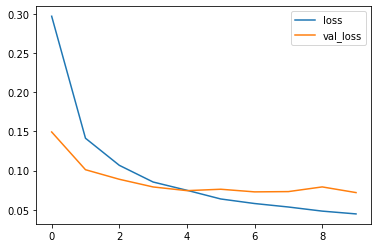

In [10]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

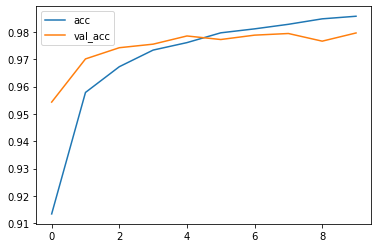

In [11]:
# plot the accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9796
[0.07194024324417114, 0.9796000123023987]


Confusion matrix, without normalization
[[ 968    0    2    1    0    1    3    1    2    2]
 [   0 1119    7    0    0    0    2    2    5    0]
 [   1    0 1020    1    1    0    2    2    4    1]
 [   0    0   14  979    1    2    0    4    6    4]
 [   0    0    4    0  969    0    4    0    0    5]
 [   3    0    0    7    1  872    4    0    3    2]
 [   4    2    2    1    4    3  940    0    2    0]
 [   2    4   17    1    2    0    0  999    1    2]
 [   4    0    5    3    5    3    2    4  945    3]
 [   0    3    0    2   11    1    1    4    2  985]]


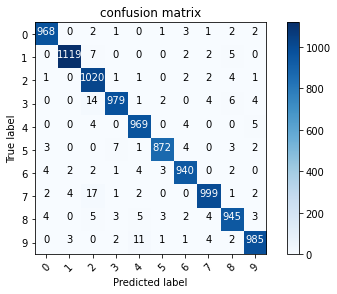

In [24]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix. 
  Normalizeation can be applied by setting 'normalize=True'.
  """

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalize confusion matrix')
  else:
      print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '2.F' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


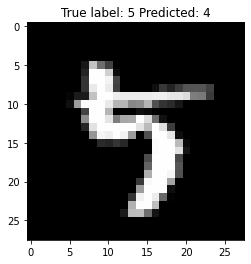

In [37]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' %(y_test[i], p_test[i]));